## Implementing Trading with Machine Learning Regression
The below flowchart represents the steps involved in implementing the trading strategy.
![flowchart](https://d2a032ejo53cab.cloudfront.net/Glossary/h1wfK3Mh/p-1.drawio.png)

 We will implement a linear regression model on Gold ETF that will predict the Day's High and Day's Low given its Day's Open, High, Low and other defined indicators. The key steps are:
 we will learn to import the data, create indicators and define dependent and independent variables. The key steps are:

Part 1.
1. [Import BTC data from Binance](#read)
2. [Create Input Parameters](#input)
3. [Create X and y Datasets](#xy)

Part 2.

4. [Import the Data](#import)
5. [Preprocess the Data](#preprocess)
6. [Grid Search Cross-Validation](#cross)
7. [Split Train and Test Data](#split)
8. [Predict the High-Low Prices](#prediction)

Part 3.

9. [Import the Data](#import)
10. [Signal Generation](#returns)
11. [Plotting GLD Returns and Strategy Returns](#plot)

Part 4.

12. [Import the Data](#import)
13. [Analyse the Performance](#analyze)
14. [Trade Details and Strategy Analytics](#trade)
15. [Visualise the Entry and Exit](#visualize)
16. [Strategy_Analysis](#analysis)

## Import the Libraries

In [61]:
# Data manipulation
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#Binance
import os
from time import sleep
import asyncio

!pip install python-binance pandas mplfinance

from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

#env
from dotenv import load_dotenv
load_dotenv()

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import asyncio

#For strategy analysis
import pyfolio as pf
# To ignore unwanted warnings
import warnings
warnings.filterwarnings("ignore")

You should consider upgrading via the 'C:\Users\John Jairo PC\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
Python-dotenv could not parse statement starting at line 5
Python-dotenv could not parse statement starting at line 11


<a id='read'></a>
## Read BTC data from BINANCE

We have imported the BITCOIN (BTC) data with the api with BINANCE to get the OHLC format.   

This data is available in the last unit of this course, **Python Codes and Data**. You can also download the data from Yahoo! Finance.

In [62]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [63]:
apikey='ftrSLs5VqS3N0MGpVJooDZK5DrJOHPDD5aOAd9UQvoYbGKIkVZ9N6dWmmq8DVzHe'
secret='pMKLNZwLDkYoihEq8CvtIgajXODl6KqlWzU2TsmDSzNGvDmOBvVwkUiGiOpZyVaN'

In [64]:
client = Client(apikey, secret)

In [65]:
tickers = client.get_all_tickers()

In [66]:
tickers

[{'symbol': 'ETHBTC', 'price': '0.07347600'},
 {'symbol': 'LTCBTC', 'price': '0.00436400'},
 {'symbol': 'BNBBTC', 'price': '0.01490300'},
 {'symbol': 'NEOBTC', 'price': '0.00037400'},
 {'symbol': 'QTUMETH', 'price': '0.00156000'},
 {'symbol': 'EOSETH', 'price': '0.00069100'},
 {'symbol': 'SNTETH', 'price': '0.00001566'},
 {'symbol': 'BNTETH', 'price': '0.00026600'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00011640'},
 {'symbol': 'BNBETH', 'price': '0.20290000'},
 {'symbol': 'BTCUSDT', 'price': '19263.94000000'},
 {'symbol': 'ETHUSDT', 'price': '1415.77000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001041'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

Next we will create a dictionary that will hold our latest price data and also let us known if there is a problem with the websocket.

In [67]:
tickers[1]['price']
ticker_df = pd.DataFrame(tickers)
ticker_df.head()

,symbol,price
0,ETHBTC,0.07347600
1,LTCBTC,0.00436400
2,BNBBTC,0.01490300
3,NEOBTC,0.00037400
4,QTUMETH,0.00156000


In [68]:
ticker_df.tail()

,symbol,price
2134,MAGICBUSD,0.66750000
2135,MAGICUSDT,0.66700000
2136,BUSDRON,4.64200000
2137,HIFIETH,0.00034900
2138,HIFIUSDT,0.49580000


In [69]:
ticker_df.set_index('symbol', inplace=True)
float(ticker_df.loc['BTCUSDT']['price'])

19263.94

New websocket connection

In [70]:
historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')
historical

[[1502928000000,
  '4261.48000000',
  '4485.39000000',
  '4200.74000000',
  '4285.08000000',
  '795.15037700',
  1503014399999,
  '3454770.05073206',
  3427,
  '616.24854100',
  '2678216.40060401',
  '0'],
 [1503014400000,
  '4285.08000000',
  '4371.52000000',
  '3938.77000000',
  '4108.37000000',
  '1199.88826400',
  1503100799999,
  '5086958.30617151',
  5233,
  '972.86871000',
  '4129123.31651808',
  '0'],
 [1503100800000,
  '4108.37000000',
  '4184.69000000',
  '3850.00000000',
  '4139.98000000',
  '381.30976300',
  1503187199999,
  '1549483.73542151',
  2153,
  '274.33604200',
  '1118001.87008735',
  '0'],
 [1503187200000,
  '4120.98000000',
  '4211.08000000',
  '4032.62000000',
  '4086.29000000',
  '467.08302200',
  1503273599999,
  '1930364.39032646',
  2321,
  '376.79594700',
  '1557401.33373730',
  '0'],
 [1503273600000,
  '4069.13000000',
  '4119.62000000',
  '3911.79000000',
  '4016.00000000',
  '691.74306000',
  1503359999999,
  '2797231.71402728',
  3972,
  '557.35610700',

In [71]:
hist_df = pd.DataFrame(historical)
hist_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


## Bitcoin’s historical price data

In [72]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
#hist_df.set_index('Open Time')
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1971,1673222400000,17127.83000000,17398.80000000,17104.66000000,17178.26000000,266211.52723000,1673308799999,4590284350.54616930,6327667,131748.52517000,2271681164.79933240,0
1972,1673308800000,17179.04000000,17499.00000000,17146.34000000,17440.66000000,221382.42581000,1673395199999,3829247653.73110520,5448751,109377.45606000,1891995855.28760790,0
1973,1673395200000,17440.64000000,18000.00000000,17315.60000000,17943.26000000,262221.60653000,1673481599999,4586965947.26354980,5627464,129944.56930000,2273368097.02926420,0
1974,1673481600000,17943.26000000,19117.04000000,17892.05000000,18846.62000000,454568.32178000,1673567999999,8348431207.84600970,8911373,227295.33172000,4174813798.38286060,0
1975,1673568000000,18846.62000000,19406.26000000,18714.12000000,19267.33000000,278884.97452000,1673654399999,5300006498.48623950,6220553,137830.46911000,2619609286.83402730,0


## Create a Pandas DataFrame and export to CSV

In [73]:
hist_df.shape
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [74]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [75]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [76]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [77]:
crypto_price=hist_df.drop(columns=[ 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades','Close Time' ])

In [78]:
crypto_price.tail(1000)

,Open Time,Open,High,Low,Close,Volume
976,2020-04-19,7248.60,7266.15,7055.60,7120.74,45664.863930
977,2020-04-20,7121.40,7220.00,6751.00,6826.83,90149.491370
978,2020-04-21,6828.98,6940.00,6762.00,6841.37,60109.710808
979,2020-04-22,6841.36,7156.38,6818.00,7125.14,61486.377334
980,2020-04-23,7125.12,7738.00,7020.00,7482.39,102773.569561
...,...,...,...,...,...,...
1971,2023-01-09,17127.83,17398.80,17104.66,17178.26,266211.527230
1972,2023-01-10,17179.04,17499.00,17146.34,17440.66,221382.425810
1973,2023-01-11,17440.64,18000.00,17315.60,17943.26,262221.606530
1974,2023-01-12,17943.26,19117.04,17892.05,18846.62,454568.321780


In [79]:
crypto_price.dtypes

Open Time    datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
dtype: object

In [80]:
crypto_price.describe()

,Open,High,Low,Close,Volume
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,19407.375329,19950.495825,18785.222561,19415.040845,69145.942934
std,16680.390180,17140.584219,16144.705690,16676.974713,73197.611156
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,7317.405000,7494.952500,7140.972500,7326.785000,30490.071828
50%,10626.770000,10912.935000,10263.925000,10646.775000,47299.314062
75%,30893.270000,32027.875000,29483.207500,30891.872500,77928.717108
max,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783


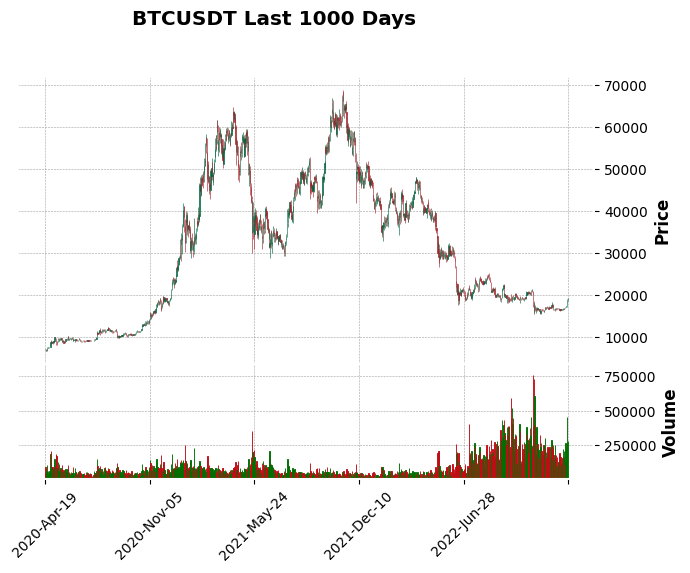

In [81]:
import mplfinance as mpf
crypto_price.set_index('Open Time').tail(1000)
mpf.plot(crypto_price.set_index('Open Time').tail(1000), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDT Last 1000 Days') 
        #mav=(10,20,30))


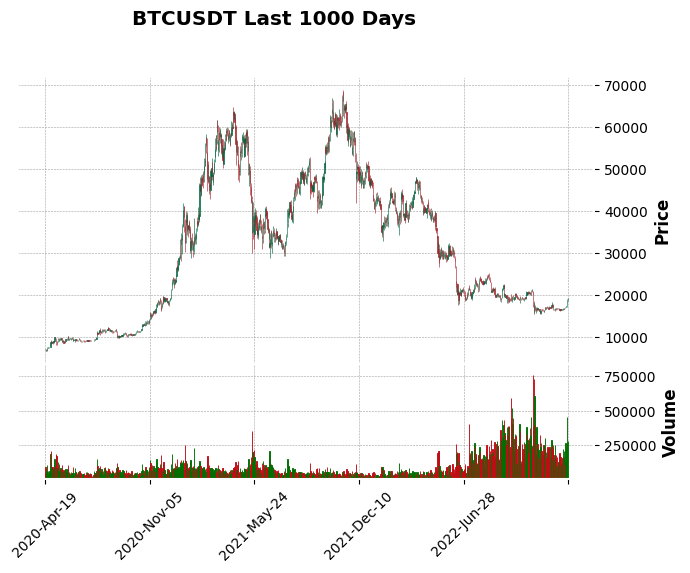

In [82]:
mpf.plot(crypto_price.set_index('Open Time').tail(1000), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDT Last 1000 Days') 
        #mav=(10,20,30))

In [83]:
# Calculate 3-day moving average of close prices
crypto_price['S_3'] = crypto_price['Close'].shift(1).rolling(window=3).mean()

# Calculate 15-day moving average of close prices
crypto_price['S_15'] = crypto_price['Close'].shift(1).rolling(window=15).mean()

# Calculate 60-day moving average of close prices
crypto_price['S_60'] = crypto_price['Close'].shift(1).rolling(window=60).mean()

# Calculate the correlation between close price and 3 day moving average
crypto_price['Corr'] = crypto_price['Close'].shift(1).rolling(window=10).corr(crypto_price['S_3'].shift(1))

# Calculate the difference between High & Open, Open & Low
crypto_price['Std_U'] = crypto_price['High']-crypto_price['Open']
crypto_price['Std_D'] = crypto_price['Open']-crypto_price['Low']

# Calculate the difference between `Open` & previous day's `Open`, and `Open` & previous day's `Close`
crypto_price['OD'] = crypto_price['Open']-crypto_price['Open'].shift(1)
crypto_price['OL'] = crypto_price['Open']-crypto_price['Close'].shift(1)
#crypto_price.set_index('Open Time')
cp=crypto_price.set_index('Open Time')
cp.tail()


,Open,High,Low,Close,Volume,S_3,S_15,S_60,Corr,Std_U,Std_D,OD,OL
Open Time,,,,,,,,,,,,,
2023-01-09,17127.83,17398.80,17104.66,17178.26,266211.52723,17007.350000,16763.838667,16811.178833,0.923255,270.97,23.17,184.00,0.00
2023-01-10,17179.04,17499.00,17146.34,17440.66,221382.42581,17083.220000,16786.915333,16804.130667,0.948533,319.96,32.70,51.21,0.78
2023-01-11,17440.64,18000.00,17315.60,17943.26,262221.60653,17248.916667,16821.666667,16810.303167,0.965810,559.36,125.04,261.60,-0.02
2023-01-12,17943.26,19117.04,17892.05,18846.62,454568.32178,17520.726667,16904.126667,16829.156167,0.958206,1173.78,51.21,502.62,0.00
2023-01-13,18846.62,19406.26,18714.12,19267.33,278884.97452,18076.846667,17057.414000,16871.102333,0.965358,559.64,132.50,903.36,0.00


In [84]:
# Here we check for NaN values
cp.isna().sum()



Open       0
High       0
Low        0
Close      0
Volume     0
S_3        3
S_15      15
S_60      60
Corr      13
Std_U      0
Std_D      0
OD         1
OL         1
dtype: int64

In [85]:
cp.dropna(inplace=True)
cp.isna().sum()


Open      0
High      0
Low       0
Close     0
Volume    0
S_3       0
S_15      0
S_60      0
Corr      0
Std_U     0
Std_D     0
OD        0
OL        0
dtype: int64

In [86]:
X = cp[['Open', 'S_3', 'S_15', 'S_60', 'OD', 'OL', 'Corr']]
X.tail()


,Open,S_3,S_15,S_60,OD,OL,Corr
Open Time,,,,,,,
2023-01-09,17127.83,17007.350000,16763.838667,16811.178833,184.00,0.00,0.923255
2023-01-10,17179.04,17083.220000,16786.915333,16804.130667,51.21,0.78,0.948533
2023-01-11,17440.64,17248.916667,16821.666667,16810.303167,261.60,-0.02,0.965810
2023-01-12,17943.26,17520.726667,16904.126667,16829.156167,502.62,0.00,0.958206
2023-01-13,18846.62,18076.846667,17057.414000,16871.102333,903.36,0.00,0.965358


In [87]:
# Dependent variable for upward deviation
yU = cp['Std_U']
yU.tail()

Open Time
2023-01-09     270.97
2023-01-10     319.96
2023-01-11     559.36
2023-01-12    1173.78
2023-01-13     559.64
Name: Std_U, dtype: float64

In [88]:
# Dependent variable for downward deviation
yD = cp['Std_D']
yD.tail()

Open Time
2023-01-09     23.17
2023-01-10     32.70
2023-01-11    125.04
2023-01-12     51.21
2023-01-13    132.50
Name: Std_D, dtype: float64

In [89]:
cp.tail()

,Open,High,Low,Close,Volume,S_3,S_15,S_60,Corr,Std_U,Std_D,OD,OL
Open Time,,,,,,,,,,,,,
2023-01-09,17127.83,17398.80,17104.66,17178.26,266211.52723,17007.350000,16763.838667,16811.178833,0.923255,270.97,23.17,184.00,0.00
2023-01-10,17179.04,17499.00,17146.34,17440.66,221382.42581,17083.220000,16786.915333,16804.130667,0.948533,319.96,32.70,51.21,0.78
2023-01-11,17440.64,18000.00,17315.60,17943.26,262221.60653,17248.916667,16821.666667,16810.303167,0.965810,559.36,125.04,261.60,-0.02
2023-01-12,17943.26,19117.04,17892.05,18846.62,454568.32178,17520.726667,16904.126667,16829.156167,0.958206,1173.78,51.21,502.62,0.00
2023-01-13,18846.62,19406.26,18714.12,19267.33,278884.97452,18076.846667,17057.414000,16871.102333,0.965358,559.64,132.50,903.36,0.00


In [90]:
##parte 2

In [91]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1916 entries, 2017-10-16 to 2023-01-13
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1916 non-null   float64
 1   High    1916 non-null   float64
 2   Low     1916 non-null   float64
 3   Close   1916 non-null   float64
 4   Volume  1916 non-null   float64
 5   S_3     1916 non-null   float64
 6   S_15    1916 non-null   float64
 7   S_60    1916 non-null   float64
 8   Corr    1916 non-null   float64
 9   Std_U   1916 non-null   float64
 10  Std_D   1916 non-null   float64
 11  OD      1916 non-null   float64
 12  OL      1916 non-null   float64
dtypes: float64(13)
memory usage: 209.6 KB


In [92]:
# Independent variables
X = cp[['Open', 'Low', 'High', 'Close','S_3', 'S_15', 'S_60', 'OD', 'OL', 'Corr']]

# Dependent variable for upward deviation
yU = cp['Std_U']

# Dependent variable for downward deviation
yD = cp['Std_D']

In [93]:
# First we put scaling and then linear regression in the pipeline.
steps = [('scaler', StandardScaler()),
         ('linear', LinearRegression())]

# Defining pipeline
pipeline = Pipeline(steps)

In [94]:
# Here we are using intercept as hyperparameter
parameters = {'linear__fit_intercept': [0, 1]}

In [95]:
# Using TimeSeriesSplit for cross validation
my_cv = TimeSeriesSplit(n_splits=5)

# Defining reg as variable for GridSearch function containing pipeline, hyperparameters
reg = GridSearchCV(pipeline, parameters, cv=my_cv)

In [96]:
spilitting_ratio = .70

# Splitting the data into two parts
# Using int to make sure integer number comes out.
split = int(spilitting_ratio*len(cp))

# Defining train dataset
X_train = X[:split]
yU_train = yU[:split]
yD_train = yD[:split]

# Defining test data
X_test = X[split:]

In [97]:
# Fit the model
reg.fit(X_train, yU_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear', LinearRegression())]),
             param_grid={'linear__fit_intercept': [0, 1]})

In [98]:
# Print best parameter
print(reg.best_params_)

{'linear__fit_intercept': 1}


In [99]:
# Predict the upward deviation
yU_predict = reg.predict(X_test)
#yU_predict.tail()

In [100]:
# Fit the model
reg.fit(X_train, yD_train)

# Print best parameter
print(reg.best_params_)

# Predict the downward deviation
yD_predict = reg.predict(X_test)

{'linear__fit_intercept': 1}


In [101]:
# Create new column in X_test
X_test['yU_predict'] = yU_predict
X_test['yD_predict'] = yD_predict

# Assign zero to all the negative predicted values to take into account real life conditions
X_test.loc[X_test['yU_predict'] < 0, 'yU_predict'] = 0
X_test.loc[X_test['yD_predict'] < 0, 'yD_predict'] = 0

In [102]:
# Add open values in ['yU_predict'] to get the predicted high column
X_test['P_H'] = X_test['Open']+X_test['yU_predict']

# Subtract ['yD_predict'] values in open to get the predicted low column.
X_test['P_L'] = X_test['Open']-X_test['yD_predict']

# Print tail of gold_prices dataframe
#X_test.tail()
X_test.tail()

,Open,Low,High,Close,S_3,S_15,S_60,OD,OL,Corr,yU_predict,yD_predict,P_H,P_L
Open Time,,,,,,,,,,,,,,
2023-01-09,17127.83,17104.66,17398.80,17178.26,17007.350000,16763.838667,16811.178833,184.00,0.00,0.923255,270.97,23.17,17398.80,17104.66
2023-01-10,17179.04,17146.34,17499.00,17440.66,17083.220000,16786.915333,16804.130667,51.21,0.78,0.948533,319.96,32.70,17499.00,17146.34
2023-01-11,17440.64,17315.60,18000.00,17943.26,17248.916667,16821.666667,16810.303167,261.60,-0.02,0.965810,559.36,125.04,18000.00,17315.60
2023-01-12,17943.26,17892.05,19117.04,18846.62,17520.726667,16904.126667,16829.156167,502.62,0.00,0.958206,1173.78,51.21,19117.04,17892.05
2023-01-13,18846.62,18714.12,19406.26,19267.33,18076.846667,17057.414000,16871.102333,903.36,0.00,0.965358,559.64,132.50,19406.26,18714.12


In [103]:
# Copy columns from gold_prices to X_test
X_test[['Close', 'High', 'Low']] = cp[['Close', 'High', 'Low']][split:]
X_test.tail()
#X_test.tail()

,Open,Low,High,Close,S_3,S_15,S_60,OD,OL,Corr,yU_predict,yD_predict,P_H,P_L
Open Time,,,,,,,,,,,,,,
2023-01-09,17127.83,17104.66,17398.80,17178.26,17007.350000,16763.838667,16811.178833,184.00,0.00,0.923255,270.97,23.17,17398.80,17104.66
2023-01-10,17179.04,17146.34,17499.00,17440.66,17083.220000,16786.915333,16804.130667,51.21,0.78,0.948533,319.96,32.70,17499.00,17146.34
2023-01-11,17440.64,17315.60,18000.00,17943.26,17248.916667,16821.666667,16810.303167,261.60,-0.02,0.965810,559.36,125.04,18000.00,17315.60
2023-01-12,17943.26,17892.05,19117.04,18846.62,17520.726667,16904.126667,16829.156167,502.62,0.00,0.958206,1173.78,51.21,19117.04,17892.05
2023-01-13,18846.62,18714.12,19406.26,19267.33,18076.846667,17057.414000,16871.102333,903.36,0.00,0.965358,559.64,132.50,19406.26,18714.12


In [104]:
#import mplfinance as mpf
#X_test['Date'] =crypto_price['Open Time']
test_dataset=X_test
test_dataset.tail()



,Open,Low,High,Close,S_3,S_15,S_60,OD,OL,Corr,yU_predict,yD_predict,P_H,P_L
Open Time,,,,,,,,,,,,,,
2023-01-09,17127.83,17104.66,17398.80,17178.26,17007.350000,16763.838667,16811.178833,184.00,0.00,0.923255,270.97,23.17,17398.80,17104.66
2023-01-10,17179.04,17146.34,17499.00,17440.66,17083.220000,16786.915333,16804.130667,51.21,0.78,0.948533,319.96,32.70,17499.00,17146.34
2023-01-11,17440.64,17315.60,18000.00,17943.26,17248.916667,16821.666667,16810.303167,261.60,-0.02,0.965810,559.36,125.04,18000.00,17315.60
2023-01-12,17943.26,17892.05,19117.04,18846.62,17520.726667,16904.126667,16829.156167,502.62,0.00,0.958206,1173.78,51.21,19117.04,17892.05
2023-01-13,18846.62,18714.12,19406.26,19267.33,18076.846667,17057.414000,16871.102333,903.36,0.00,0.965358,559.64,132.50,19406.26,18714.12


In [105]:
# Initialising signal column to be zero
test_dataset['Signal'] = 0

# When selling, assigning signal value as -1
test_dataset.loc[(test_dataset['High'] > test_dataset['P_H']) & (
    test_dataset['Low'] > test_dataset['P_L']), 'Signal'] = -1

# When buying, assigning signal value as +1
test_dataset.loc[(test_dataset['High'] < test_dataset['P_H']) & (
    test_dataset['Low'] < test_dataset['P_L']), 'Signal'] = 1
test_dataset.tail()

,Open,Low,High,Close,S_3,S_15,S_60,OD,OL,Corr,yU_predict,yD_predict,P_H,P_L,Signal
Open Time,,,,,,,,,,,,,,,
2023-01-09,17127.83,17104.66,17398.80,17178.26,17007.350000,16763.838667,16811.178833,184.00,0.00,0.923255,270.97,23.17,17398.80,17104.66,0
2023-01-10,17179.04,17146.34,17499.00,17440.66,17083.220000,16786.915333,16804.130667,51.21,0.78,0.948533,319.96,32.70,17499.00,17146.34,0
2023-01-11,17440.64,17315.60,18000.00,17943.26,17248.916667,16821.666667,16810.303167,261.60,-0.02,0.965810,559.36,125.04,18000.00,17315.60,0
2023-01-12,17943.26,17892.05,19117.04,18846.62,17520.726667,16904.126667,16829.156167,502.62,0.00,0.958206,1173.78,51.21,19117.04,17892.05,0
2023-01-13,18846.62,18714.12,19406.26,19267.33,18076.846667,17057.414000,16871.102333,903.36,0.00,0.965358,559.64,132.50,19406.26,18714.12,0


In [106]:
# Compute GLD returns
test_dataset['BTC_returns'] = test_dataset['Close'].pct_change()

# Compute strategy returns
test_dataset['strategy_returns'] = test_dataset['BTC_returns'] * \
    (test_dataset['Signal'].shift(1))

# Printing tail of the test_dataset
#test_dataset.tail()
test_dataset.tail()


,Open,Low,High,Close,S_3,S_15,S_60,OD,OL,Corr,yU_predict,yD_predict,P_H,P_L,Signal,BTC_returns,strategy_returns
Open Time,,,,,,,,,,,,,,,,,
2023-01-09,17127.83,17104.66,17398.80,17178.26,17007.350000,16763.838667,16811.178833,184.00,0.00,0.923255,270.97,23.17,17398.80,17104.66,0,0.002944,0.0
2023-01-10,17179.04,17146.34,17499.00,17440.66,17083.220000,16786.915333,16804.130667,51.21,0.78,0.948533,319.96,32.70,17499.00,17146.34,0,0.015275,0.0
2023-01-11,17440.64,17315.60,18000.00,17943.26,17248.916667,16821.666667,16810.303167,261.60,-0.02,0.965810,559.36,125.04,18000.00,17315.60,0,0.028818,0.0
2023-01-12,17943.26,17892.05,19117.04,18846.62,17520.726667,16904.126667,16829.156167,502.62,0.00,0.958206,1173.78,51.21,19117.04,17892.05,0,0.050345,0.0
2023-01-13,18846.62,18714.12,19406.26,19267.33,18076.846667,17057.414000,16871.102333,903.36,0.00,0.965358,559.64,132.50,19406.26,18714.12,0,0.022323,0.0


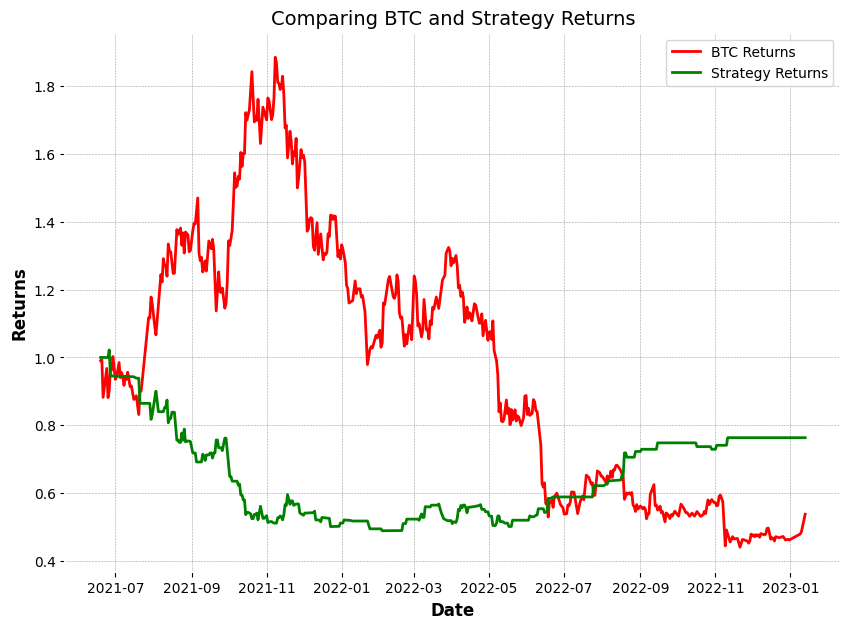

In [107]:
plt.figure(figsize=(10, 7))
# Plotting gld_returns
plt.plot(((test_dataset['BTC_returns'][:]+1).cumprod()),
         color='r', label='BTC Returns')

# Plotting test_dataset
plt.plot(((test_dataset['strategy_returns'][:]+1).cumprod()),
         color='g', label='Strategy Returns')

# x-labeling
plt.xlabel('Date', fontsize=12)

# y-labeling
plt.ylabel('Returns', fontsize=12)

# Titlename
plt.title('Comparing BTC and Strategy Returns', fontsize=14)
plt.legend()
plt.show()

In [108]:
#part 3

In [109]:
strategy_data=test_dataset

In [110]:
# The below function returns the Sharpe ratio for the excess returns
def annualized_sharpe_ratio(returns, N=252):
    return np.sqrt(N) * returns.mean() / returns.std()


# Calculate the excess daily return by assuming an annual risk free rate of return of 5%
excess_daily_strategy_return = strategy_data['strategy_returns'] - 0.05/252

# Calculate the annualized Sharpe ratio
sharpe = annualized_sharpe_ratio(excess_daily_strategy_return)
print('Sharpe', sharpe)

Sharpe -0.5200250376931332


In [111]:
def get_trades(data, close_column, signal_column):
    """Function to generate trade details
    """
    # Intializing trades dataframe
    trades = pd.DataFrame()

    # There are no current positions open at the beginning
    current_position = 0

    # Creating an empty string for entry_date
    entry_date = ''

    for i in data.index:

        # Save the signal generated on date i in 'new_position'
        new_position = data.loc[i, signal_column]

        # We don't take any action if the current_position is equal to the signal generated at date i.
        # The below code will run if the signal generated is not equal to current_position.
        if new_position != current_position:

            # The below code will run if the entry_date is not empty
            if entry_date != '':

                # save entry price in entry_price
                entry_price = data.loc[entry_date, close_column]

                # Since the signal and current_position are not equal, we exit the position at date i
                exit_date = i

                # Save exit price in exit_price
                exit_price = data.loc[exit_date, close_column]

                # Create a dataframe trade_details with trade details
                trade_details = pd.DataFrame(
                    [(current_position, entry_date, entry_price, exit_date, exit_price)])

                # Update the trades dataframe in every loop
                trades = trades.append(trade_details, ignore_index=True)

                # Reset the entry_date
                entry_date = ''

            # If the new_position i.e. signal generated at i is not '0' and also not equal to current_position, we will enter either short or long trade
            if new_position != 0:

                # Save entry date of trade in entry_date
                entry_date = i

            # Update the current_position with signal generated on date i
            current_position = new_position

    # Creating below five columns in trades dataframe.
    trades.columns = ['Position', 'Entry Date',
                      'Entry Price', 'Exit Date', 'Exit Price']

    # Create a column in trades dataframe to store the profit and loss from each trade
    trades['PnL'] = (trades['Exit Price'] -
                     trades['Entry Price']) * trades['Position']

    # Returns 'trades' dataframe
    return trades

In [112]:
def get_analytics(trades):
    """Function to generate strategy analytics
    """

    analytics = pd.DataFrame(index=['Strategy'])
    # Number of long trades
    analytics['num_of_long'] = len(trades.loc[trades.Position == 1])
    # Number of short trades
    analytics['num_of_short'] = len(trades.loc[trades.Position == -1])
    # Total number of trades
    analytics['total_trades'] = analytics.num_of_long + analytics.num_of_short

    # Gross Profit
    analytics['gross_profit'] = trades.loc[trades.PnL > 0].PnL.sum()
    # Gross Loss
    analytics['gross_loss'] = trades.loc[trades.PnL < 0].PnL.sum()

    # Net Profit
    analytics['net_profit'] = trades.PnL.sum()

    # Profitable trades
    analytics['winners'] = len(trades.loc[trades.PnL > 0])
    # Loss-making trades
    analytics['losers'] = len(trades.loc[trades.PnL <= 0])
    # Win percentage
    analytics['win_percentage'] = 100*analytics.winners/analytics.total_trades
    # Loss percentage
    analytics['loss_percentage'] = 100*analytics.losers/analytics.total_trades
    # Per trade profit/loss of winning trades
    analytics['per_trade_PnL_winners'] = trades.loc[trades.PnL > 0].PnL.mean()
    # Per trade profit/loss of losing trades
    analytics['per_trade_PnL_losers'] = trades.loc[trades.PnL <= 0].PnL.mean()

    return analytics.T

In [113]:
# Using get_trades function to evaluate trades detail
trades = get_trades(strategy_data, 'Close', 'Signal')
print('Trade Details')

# Printing trades dataframe
trades.head()


Trade Details


,Position,Entry Date,Entry Price,Exit Date,Exit Price,PnL
0,1,2021-06-25,31584.45,2021-06-26,32283.65,699.20
1,-1,2021-06-26,32283.65,2021-06-27,34700.34,-2416.69
2,-1,2021-07-13,32729.77,2021-07-14,32820.02,-90.25
3,-1,2021-07-16,31383.87,2021-07-17,31520.07,-136.20
4,-1,2021-07-20,29790.35,2021-07-21,32144.51,-2354.16


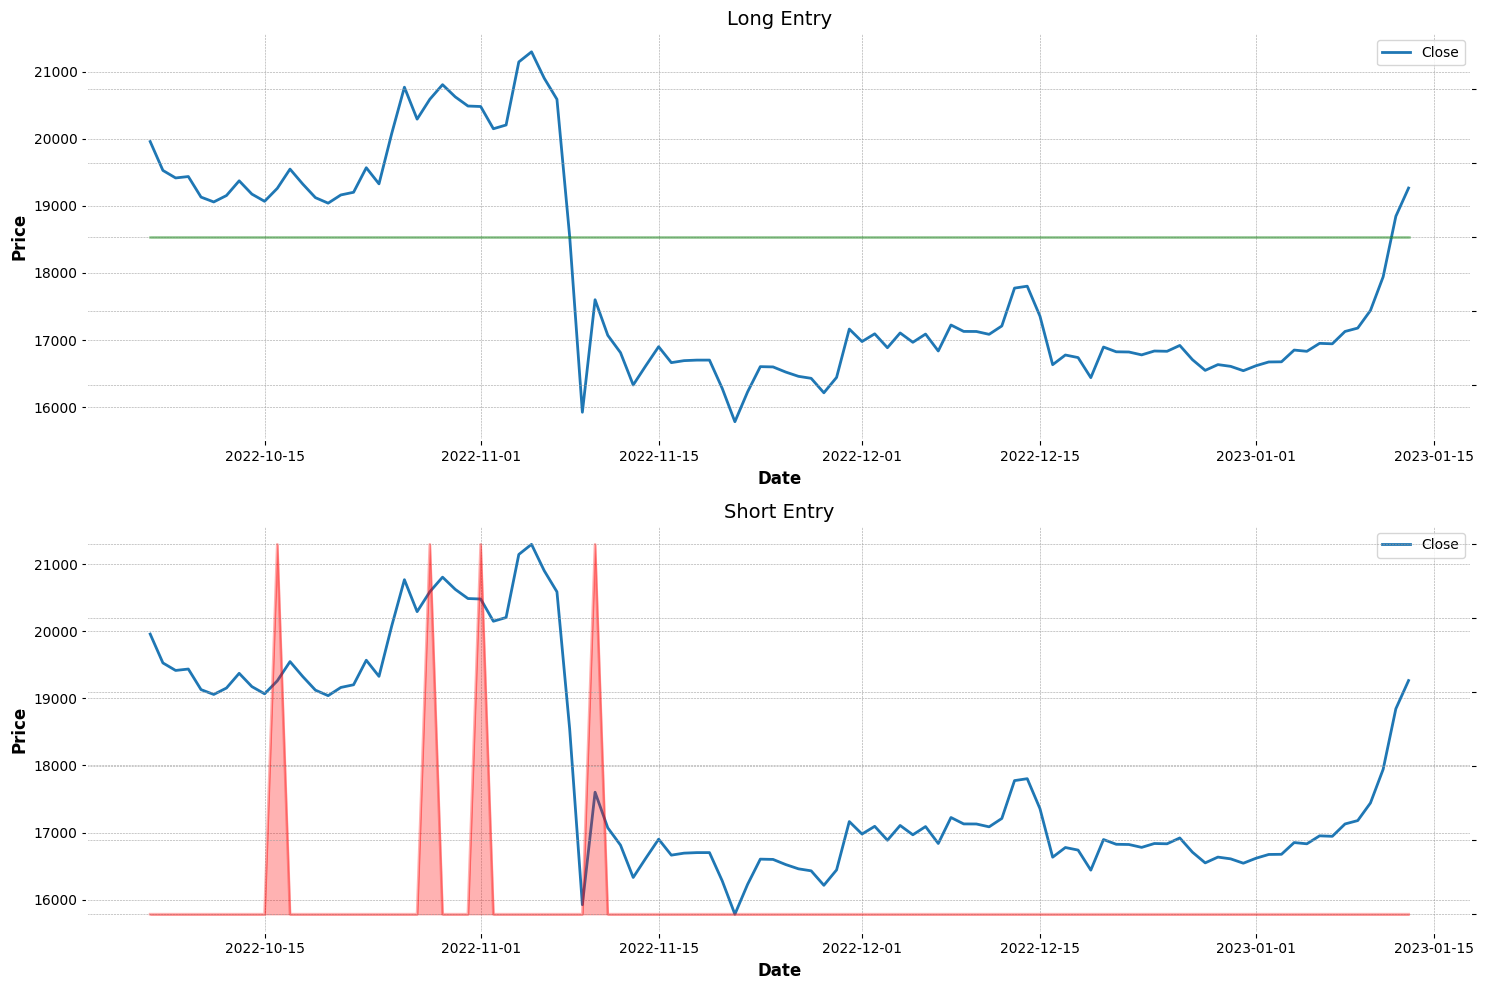

In [114]:
import matplotlib.pyplot as plt

# Showing the last 100 points for illustration purpose
test_dataset_for_plot = strategy_data[-100:]

# When signal is 1 we take long entry
test_dataset_for_plot['long_entry'] = test_dataset_for_plot.Signal == 1

# When signal is -1 we take short entry
test_dataset_for_plot['short_entry'] = test_dataset_for_plot.Signal == -1

fig = plt.figure(figsize=(15, 10))

# Sub plot for the long entry
ax = fig.add_subplot(211)

# Plotting close price
ax.plot(test_dataset_for_plot['Close'], label='Close')

# Set the title and axis labels
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Long Entry', fontsize=14)
ax.legend()


# Twinx() creates a new axes with an invisible x-axis and y axis positioned opposite to the original one
ax2 = ax.twinx()

# Plotting long entry
ax2.plot(test_dataset_for_plot['long_entry'], color='g', alpha=0.3)
ax2.fill_between(test_dataset_for_plot['long_entry'].index,
                 test_dataset_for_plot['long_entry'].values, color='g', alpha=0.3)
ax2.tick_params(labelright=False)

# Sub plot for the short position
ax = fig.add_subplot(212)

# Plot the close price
ax.plot(test_dataset_for_plot['Close'], label='Close')


# Set the title and axis labels
ax.set_title('Short Entry', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.legend()

# Plotting short entry
ax2 = ax.twinx()
ax2.plot(test_dataset_for_plot['short_entry'], color='r', alpha=0.3)
ax2.fill_between(test_dataset_for_plot['short_entry'].index,
                 test_dataset_for_plot['short_entry'].values, color='r', alpha=0.3)
ax2.tick_params(labelright=False)

plt.tight_layout()
plt.show()

In [115]:
# Calling get_analytics to analyse trades
analytics = get_analytics(trades)
print('Trade Analytics')

# Rounding off to two decimal places
round(analytics, 2)

Trade Analytics


,Strategy
num_of_long,3.00
num_of_short,87.00
total_trades,90.00
gross_profit,45473.68
gross_loss,-60181.31
net_profit,-14707.63
winners,46.00
losers,44.00
win_percentage,51.11
loss_percentage,48.89


In [116]:
# Calculating close price change percentage
strategy_data['returns'] = strategy_data.Close.pct_change()

# Strategy return depends on the last day signal
strategy_data['strategy_returns'] = strategy_data['returns'] * \
    strategy_data['Signal'].shift(1)
strategy_data.head()

,Open,Low,High,Close,S_3,S_15,S_60,OD,OL,Corr,yU_predict,yD_predict,P_H,P_L,Signal,BTC_returns,strategy_returns,returns
Open Time,,,,,,,,,,,,,,,,,,
2021-06-18,38092.97,35129.29,38202.84,35819.84,38862.006667,37158.909333,45222.811667,-256.03,0.00,0.485591,109.87,2963.68,38202.84,35129.29,0,NaN,NaN,NaN
2021-06-19,35820.48,34803.52,36457.00,35483.72,37420.606667,36930.446000,44892.590000,-2272.49,0.64,0.195244,636.52,1016.96,36457.00,34803.52,0,-0.009384,-0.0,-0.009384
2021-06-20,35483.72,33336.00,36137.72,35600.16,36465.510000,36840.760667,44543.568667,-336.76,0.00,0.163918,654.00,2147.72,36137.72,33336.00,0,0.003282,0.0,0.003282
2021-06-21,35600.17,31251.23,35750.00,31608.93,35634.573333,36846.558000,44240.444167,116.45,0.01,0.169433,149.83,4348.94,35750.00,31251.23,0,-0.112113,-0.0,-0.112113
2021-06-22,31614.12,28805.00,33298.78,32509.56,34230.936667,36567.399333,43905.743667,-3986.05,5.19,0.464536,1684.66,2809.12,33298.78,28805.00,0,0.028493,0.0,0.028493


Start date,2021-06-19
End date,2023-01-13
Total months,27
,Backtest
Annual return,-11.2%
Cumulative returns,-23.7%
Annual volatility,25.9%
Sharpe ratio,-0.33
Calmar ratio,-0.21
Stability,0.00
Max drawdown,-52.1%


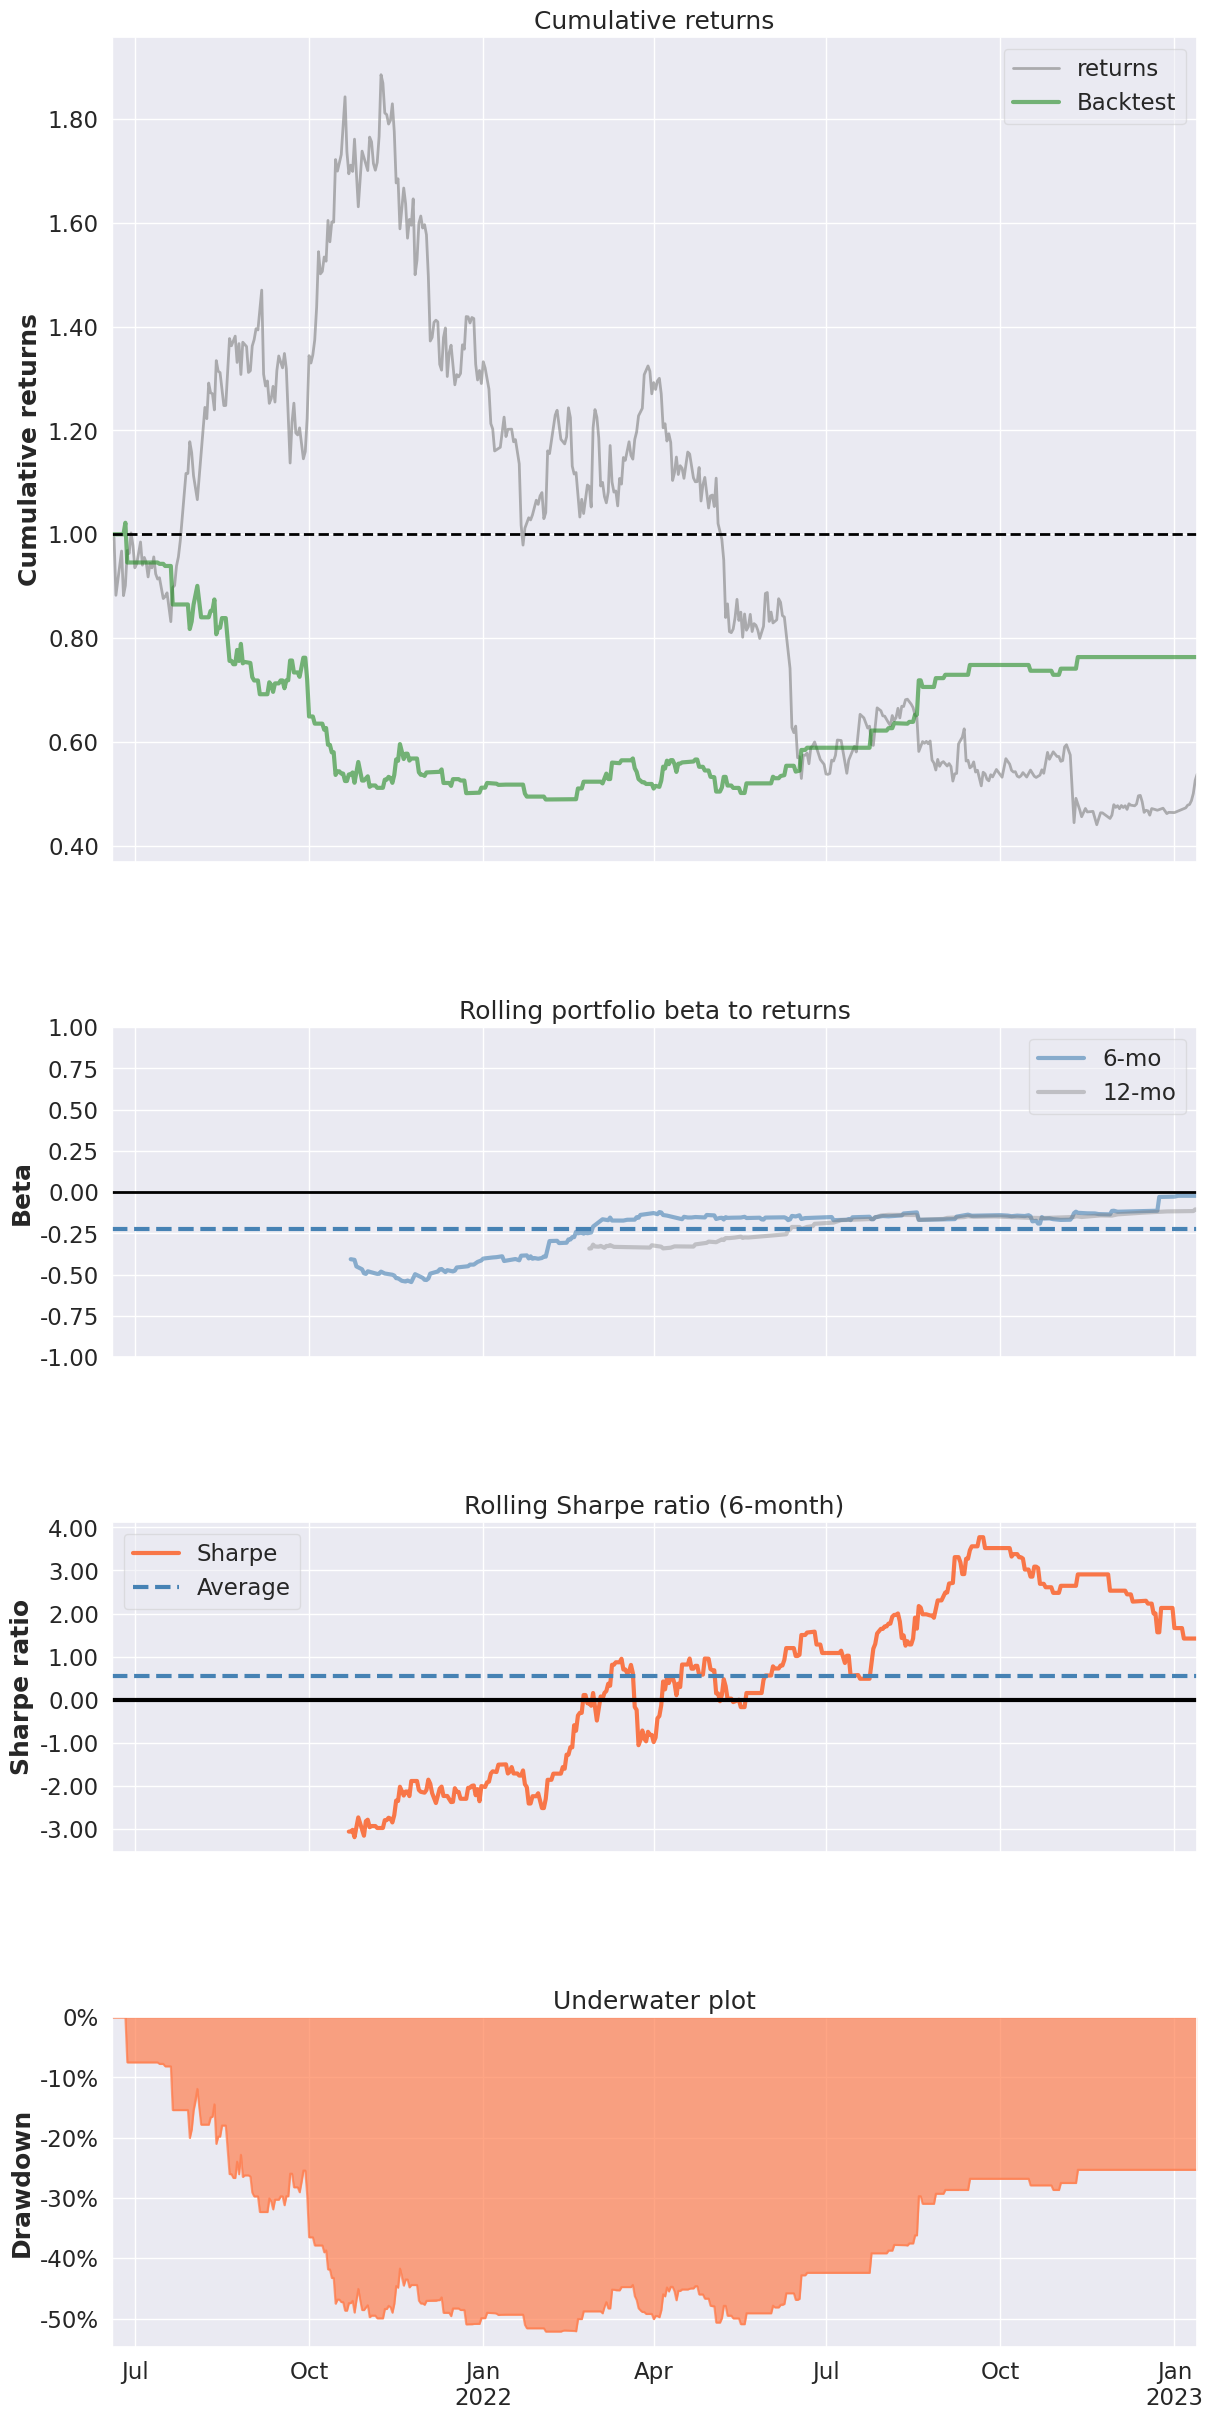

In [117]:

#Checking for NaN values
strategy_data.isna().sum()

# Dropping the NaN values 
strategy_data.dropna(inplace = True)
strategy_data.head()
#Creating pyfolio tear sheet
pf.create_simple_tear_sheet(strategy_data['strategy_returns'], benchmark_rets = strategy_data['returns']) 